# POLYNOMIAL REGRESSION by Zain Ramzan
Importing Liberaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Dataset

In [3]:
#Load dataset
data = pd.read_csv(r'C:\Users\zain\Downloads\advertising.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Looking into Dataset

In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
data.shape

(200, 4)

In [7]:
a=data.describe()
print(a)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [8]:
type(a)

pandas.core.frame.DataFrame

In [9]:
# b=a.get("TV")
# type(b)

In [10]:
# b.get('mean')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


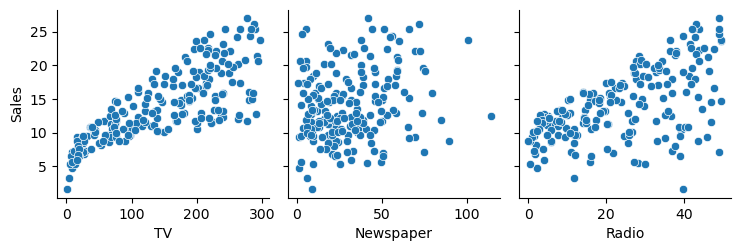

In [12]:
#scatter plots of each column (X) against sales (Y) using Seaborn
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind='scatter')
plt.show()

In [13]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


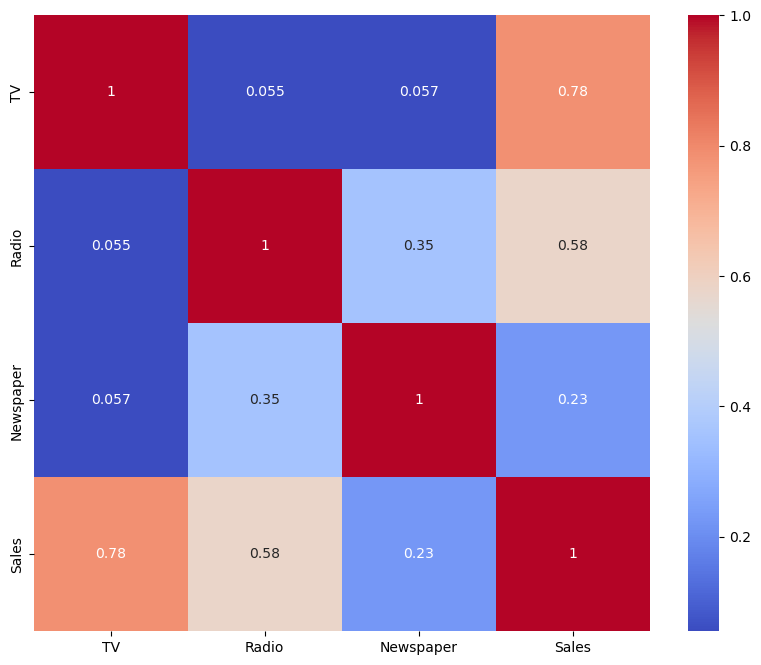

In [14]:
#correlation between different colomns
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', square=True)
#plt.title('Correlation Matrix Heatmap')
plt.show()

# Dataset Preparation for the linear regression modeling

In [15]:
X=data['TV'].values.reshape(-1,1)
Y=data['Sales'].values.reshape(-1,1)

In [16]:
type(X)

numpy.ndarray

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=100)

In [18]:
X_train.shape

(140, 1)

# Training

# Polynomial Regression Curve Fitiing

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_f=PolynomialFeatures(degree=2)
X_train_poly=poly_f.fit_transform(X_train)
X_test_poly=poly_f.fit_transform(X_test)

poly_reg=LinearRegression()
poly_reg.fit(X_train_poly, y_train)
predicted=poly_reg.predict(X_test_poly)

# Prediction

In [20]:
#Make predictions on the test set
# y_pred=model.predict(X_test)

# Evaluation on Training data X with predicted

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, predicted)
MSE = mean_squared_error(y_test, predicted)
print('Mean Absolute Error (MAE): ', MAE)
print('Mean Squared Error (MSE): ', MSE)

Mean Absolute Error (MAE):  2.16320895415944
Mean Squared Error (MSE):  7.699679306094357


# Plotting

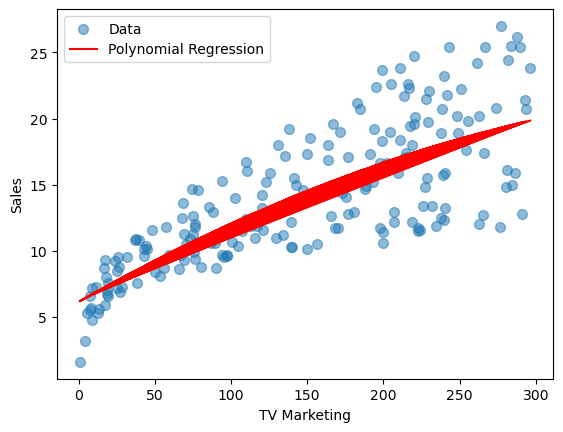

In [22]:
#Visualize the data and the linear regression line
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.plot(X_train, poly_reg.predict(X_train_poly), color='red', label='Polynomial Regression')
plt.xlabel('TV Marketing')
plt.ylabel('Sales')
plt.legend()
plt.show()